In [1]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
import pandas as pd

e:\programs\envs\species-id\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\programs\envs\species-id\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\programs\envs\species-id\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\programs\envs\species-id\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
import torch

print(torch.__version__)
print(torch)

1.10.0
<module 'torch' from 'e:\\programs\\envs\\species-id\\lib\\site-packages\\torch\\__init__.py'>


## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [3]:
path = "./TEST/"
tweety_output=True

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [4]:
isolation_parameters = {
    "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 1.0,
    "threshold_min" : 0.01,
    "window_size" : 0.2,
    "chunk_size" : 0.2
}

In [5]:
automated_df = generate_automated_labels_tweetynet(path,isolation_parameters, tweety_output=tweety_output, normalize_local_scores=True); #make this function work with tweetynet
# need a better way to generate our output. 

Failed to load ScreamingPiha6.wav_Local_Score_Graph.png


### Pandas Ouput of Automated Labeling 

In [6]:
automated_df

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID
0,2.348837,3.255814,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
1,6.860465,1.837209,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
2,11.953488,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
3,15.604651,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
4,19.255814,3.441860,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
...,...,...,...,...,...,...,...,...
250,30.093023,0.116279,./TEST/,ScreamingPiha9.wav,0,37.302857,44100,bird
251,30.395349,0.372093,./TEST/,ScreamingPiha9.wav,0,37.302857,44100,bird
252,31.604651,0.139535,./TEST/,ScreamingPiha9.wav,0,37.302857,44100,bird
253,31.813953,0.186047,./TEST/,ScreamingPiha9.wav,0,37.302857,44100,bird


### Function that gathers statistics about the duration of annotations

In [7]:
annotation_duration_statistics(automated_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,255,0.05,1.227816,6.018848,0.046512,0.116279,0.372093,1.0,88.0


### Human Manual Labels for Comparison 

In [8]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLING RATE,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,32.6160,0,1.5448,2.1297,16000,bird
1,./TEST/,ScreamingPiha1.wav,32.6160,0,10.1638,0.8498,16000,bird
2,./TEST/,ScreamingPiha1.wav,32.6160,0,0.5549,0.9999,16000,bird
3,./TEST/,ScreamingPiha1.wav,32.6160,0,8.7739,0.8399,16000,bird
4,./TEST/,ScreamingPiha1.wav,32.6160,0,12.6335,1.9997,16000,bird
...,...,...,...,...,...,...,...,...
249,./TEST/,ScreamingPiha2.wav,33.9331,0,26.9274,1.7602,44100,bird
250,./TEST/,ScreamingPiha2.wav,33.9331,0,30.8178,0.7200,44100,bird
251,./TEST/,ScreamingPiha2.wav,33.9331,0,29.8677,0.9401,44100,bird
252,./TEST/,ScreamingPiha2.wav,33.9331,0,31.5378,1.9502,44100,bird


In [9]:
annotation_duration_statistics(manual_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,254,1.87,1.068224,0.664488,0.11,0.532475,0.78005,1.767475,3.1199


### Histogram Visualization of Annotation Lengths

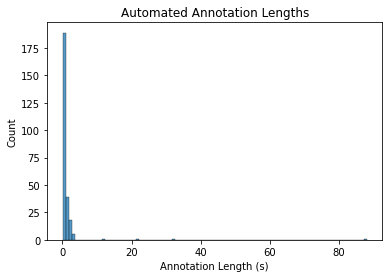

In [10]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

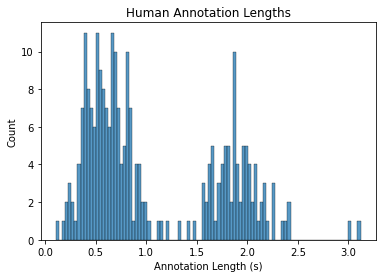

In [11]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [12]:
kaleidoscope_conversion(manual_df)

,FOLDER,IN FILE,CHANNEL,OFFSET,DURATION,MANUAL ID
0,./TEST,ScreamingPiha1.wav,0,1.5448,2.1297,bird
1,./TEST,ScreamingPiha1.wav,0,10.1638,0.8498,bird
2,./TEST,ScreamingPiha1.wav,0,0.5549,0.9999,bird
3,./TEST,ScreamingPiha1.wav,0,8.7739,0.8399,bird
4,./TEST,ScreamingPiha1.wav,0,12.6335,1.9997,bird
...,...,...,...,...,...,...
249,./TEST,ScreamingPiha2.wav,0,26.9274,1.7602,bird
250,./TEST,ScreamingPiha2.wav,0,30.8178,0.7200,bird
251,./TEST,ScreamingPiha2.wav,0,29.8677,0.9401,bird
252,./TEST,ScreamingPiha2.wav,0,31.5378,1.9502,bird


## Different Combinations of Local Score Visualization Graphs

### Baseline Graph without any annotations

No handles with labels found to put in legend.


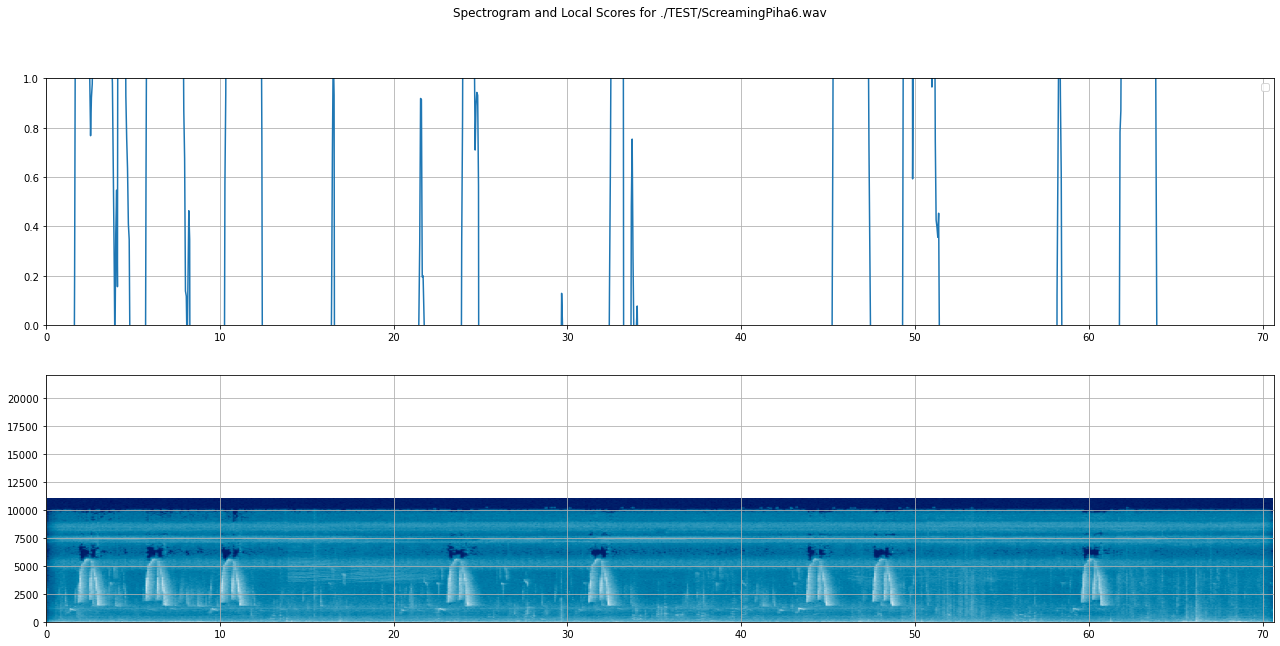

In [13]:
clip_path = "./TEST/ScreamingPiha6.wav"
local_score_visualization(clip_path, tweety_output=tweety_output)

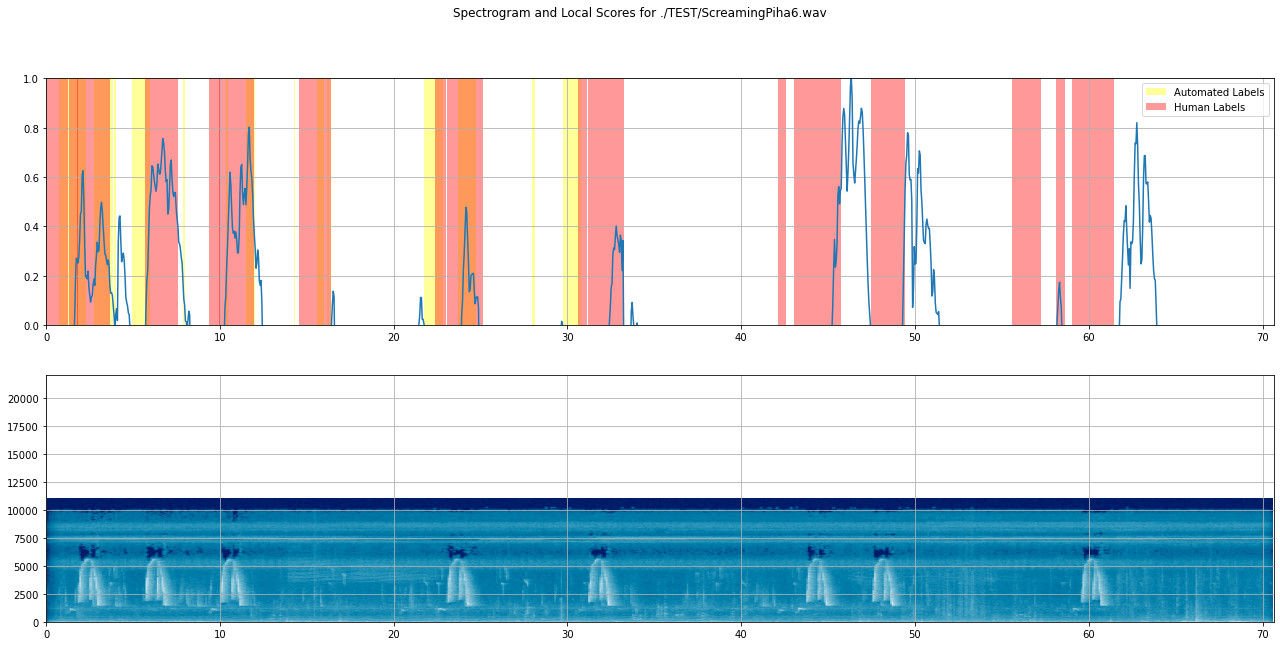

In [14]:
    local_score_visualization_tweetynet(clip_path,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, save_fig=True, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha6.wav"])

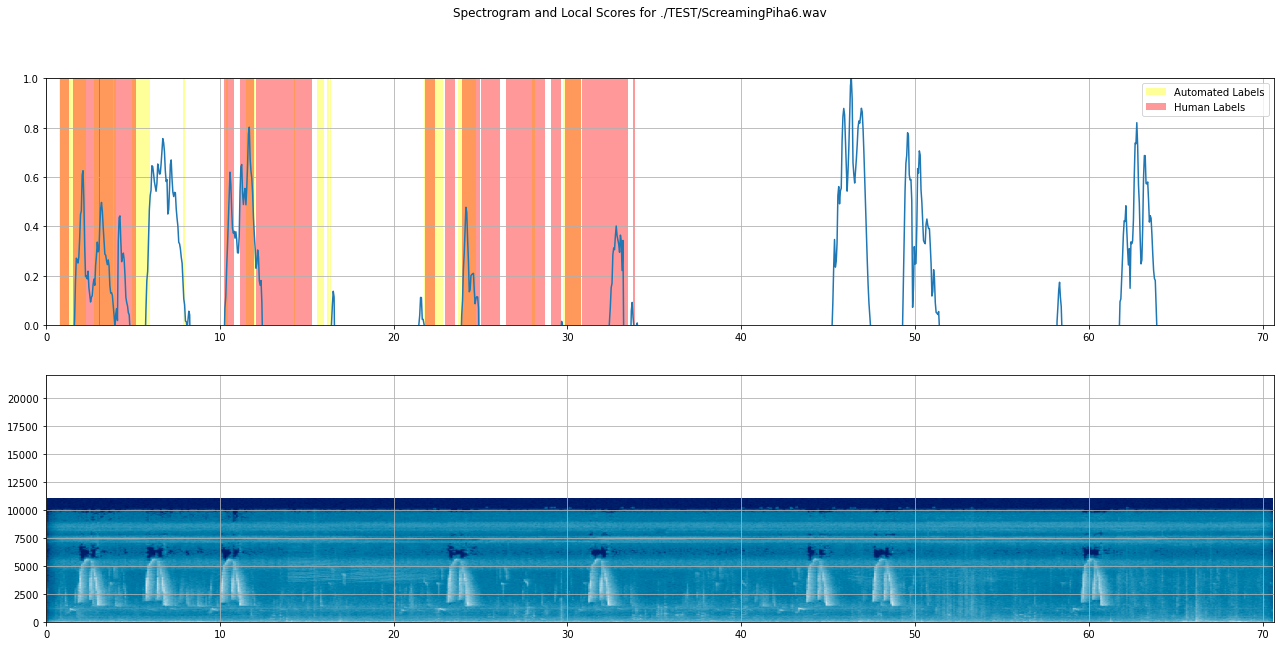

In [15]:
local_score_visualization(clip_path,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

### Baseline graph with log scale

No handles with labels found to put in legend.


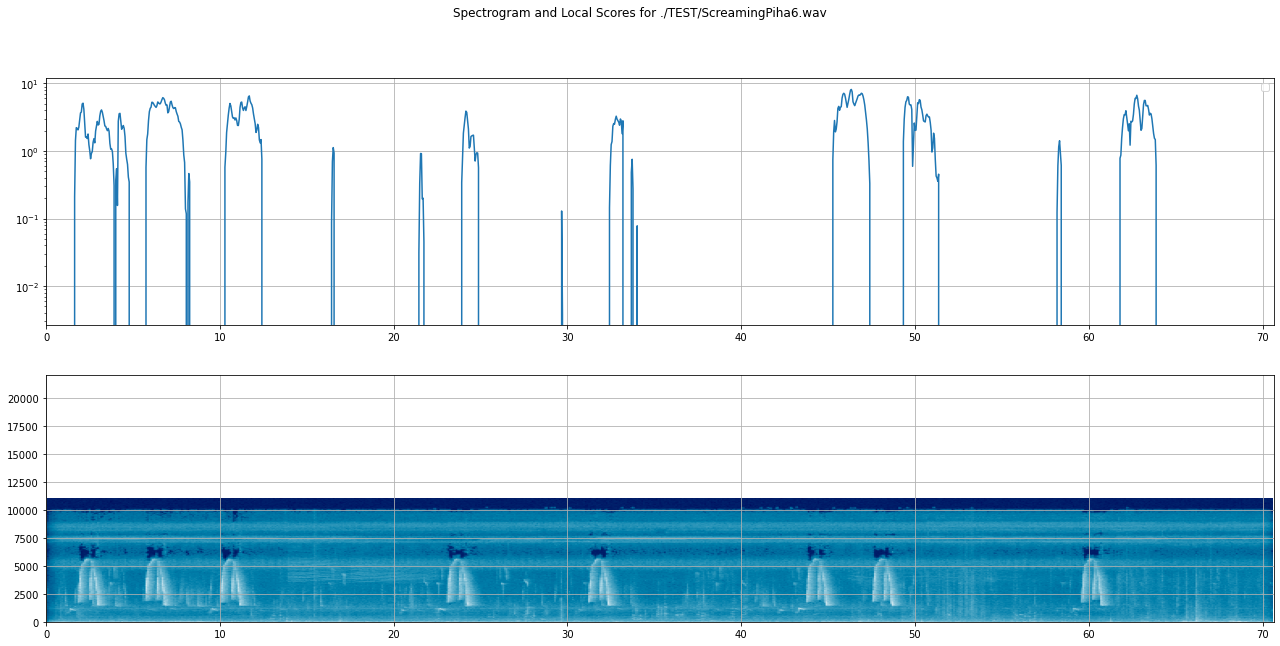

In [16]:
local_score_visualization(clip_path,log_scale = True, tweety_output=tweety_output)

### Baseline graph with normalized local score values between [0,1] 

No handles with labels found to put in legend.


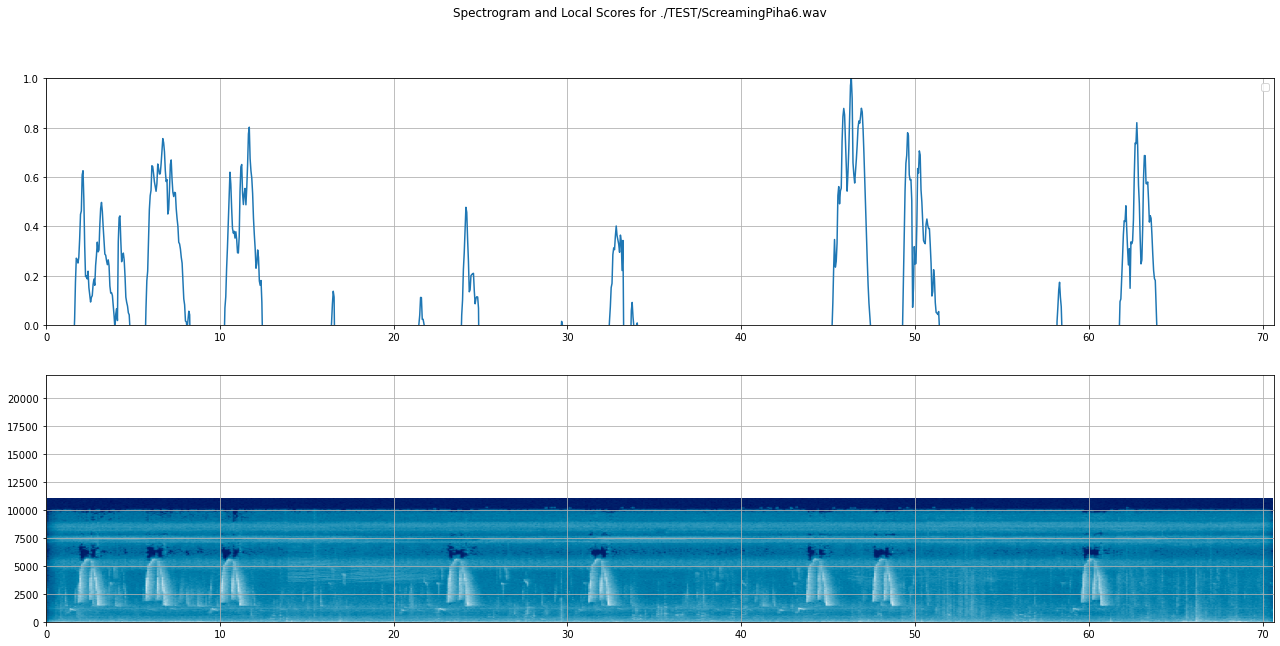

In [17]:
local_score_visualization(clip_path, normalize_local_scores = True, tweety_output=tweety_output)

### Graph with Automated Labeling 

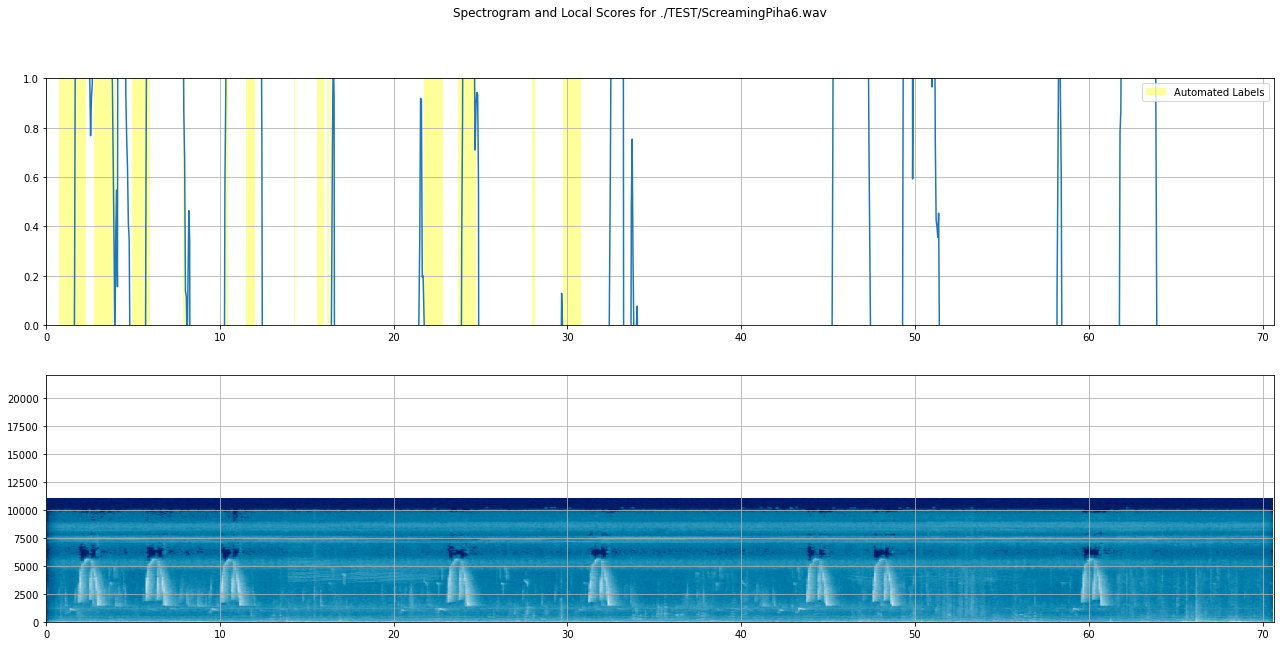

In [18]:
local_score_visualization(clip_path,automated_df = True, isolation_parameters = isolation_parameters, tweety_output=tweety_output)

### Graph with Human Labelling

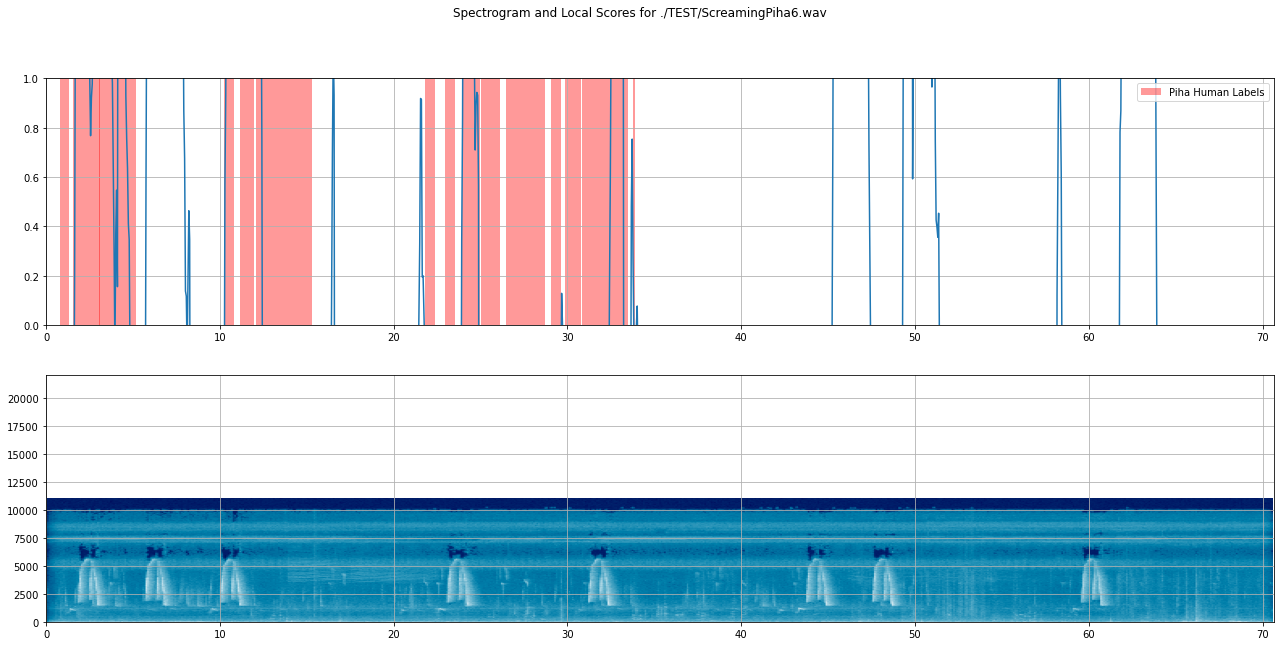

In [19]:
local_score_visualization(clip_path, tweety_output=tweety_output, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

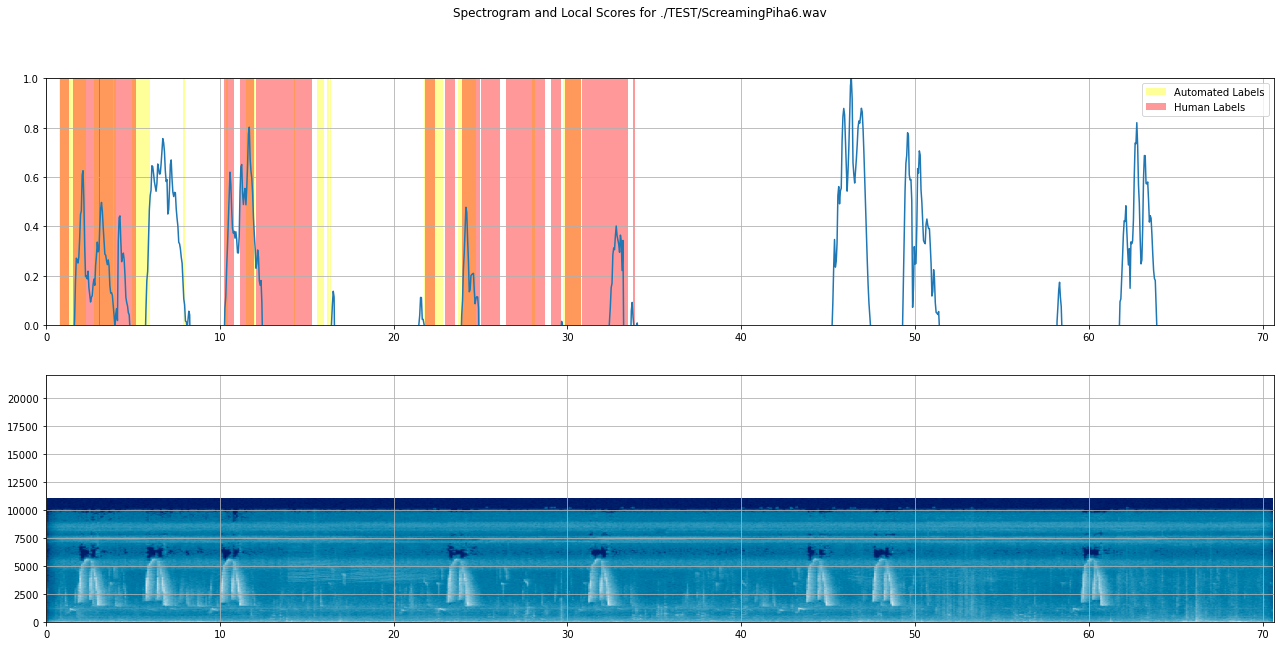

In [20]:
local_score_visualization(clip_path,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

In [21]:
clip_path_2 = "TEST/Aburria-aburri-257423.wav"
manual_df_2 = pd.read_csv("for_data_science_newline_fixed.csv")


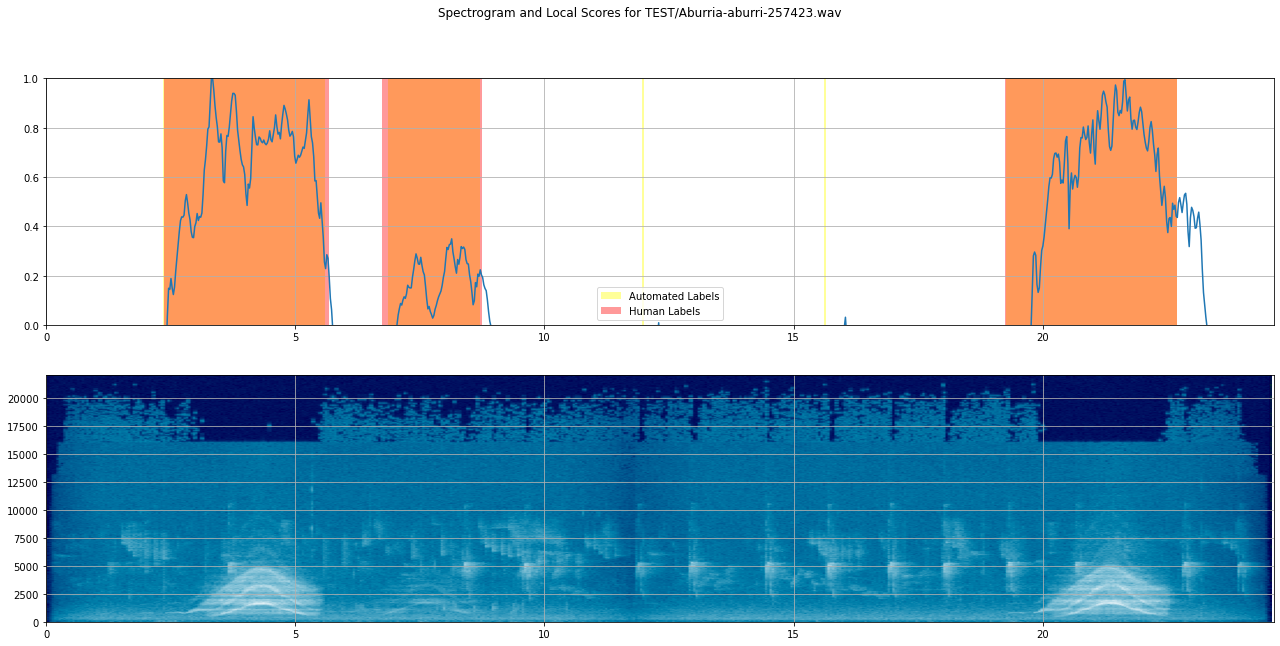

In [22]:
local_score_visualization(clip_path_2,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, premade_annotations_df = manual_df_2[manual_df_2["IN FILE"] == "Aburria-aburri-257423.wav"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

In [23]:
automated_df


,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID
0,2.348837,3.255814,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
1,6.860465,1.837209,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
2,11.953488,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
3,15.604651,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
4,19.255814,3.441860,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
...,...,...,...,...,...,...,...,...
250,30.093023,0.116279,./TEST/,ScreamingPiha9.wav,0,37.302857,44100,bird
251,30.395349,0.372093,./TEST/,ScreamingPiha9.wav,0,37.302857,44100,bird
252,31.604651,0.139535,./TEST/,ScreamingPiha9.wav,0,37.302857,44100,bird
253,31.813953,0.186047,./TEST/,ScreamingPiha9.wav,0,37.302857,44100,bird


In [24]:
automated_df[automated_df["IN FILE"] == "Aburria-aburri-257423.wav"]

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID
0,2.348837,3.255814,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
1,6.860465,1.837209,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
2,11.953488,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
3,15.604651,0.046512,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird
4,19.255814,3.441860,./TEST/,Aburria-aburri-257423.wav,0,24.633469,44100,bird


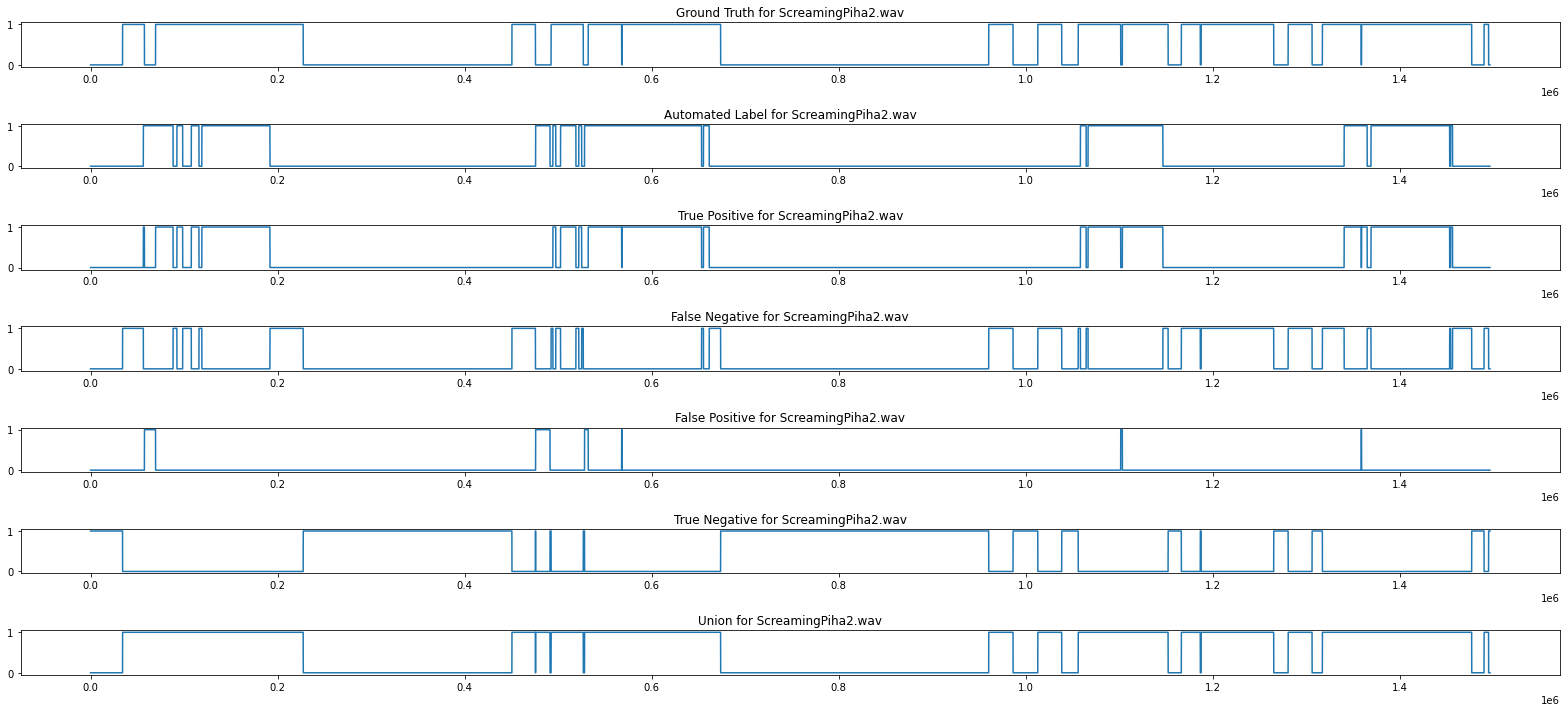

In [25]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.wav"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = plot_bird_label_scores(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [26]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

Something went wrong with: Aburria-aburri-257423.wav
Something went wrong with: Accipiter-collaris-260336.wav
Something went wrong with: Actitis-macularius-257519.wav


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./TEST/,ScreamingPiha1.wav,bird,4.961497,2.189388,9.326712,16.138390,16.477596,0.693830,0.347244,0.462846,0.301106
1,./TEST/,ScreamingPiha10.wav,bird,26.036213,5.025737,13.345079,45.375828,44.407029,0.838203,0.661132,0.739211,0.586308
2,./TEST/,ScreamingPiha11.wav,bird,20.284195,5.576372,17.533175,20.501769,43.393741,0.784368,0.536372,0.637087,0.467445
3,./TEST/,ScreamingPiha2.wav,bird,10.231837,0.768186,8.259887,14.673152,19.259909,0.930165,0.553320,0.693878,0.531251
4,./TEST/,ScreamingPiha3.wav,bird,2.093039,0.000000,2.362653,2.388390,4.455692,1.000000,0.469745,0.639220,0.469745
5,./TEST/,ScreamingPiha4.wav,bird,2.562222,3.274399,2.839342,4.881587,8.675964,0.438991,0.474348,0.455985,0.295324
6,./TEST/,ScreamingPiha5.wav,bird,6.558118,0.000000,28.740522,18.879320,35.298639,1.000000,0.185790,0.313360,0.185790
7,./TEST/,ScreamingPiha6.wav,bird,12.783764,0.216281,12.074490,45.560544,25.074535,0.983363,0.514266,0.675348,0.509831
8,./TEST/,ScreamingPiha7.wav,bird,10.384376,6.336576,41.245828,75.623424,57.966780,0.621040,0.201130,0.303854,0.179144
9,./TEST/,ScreamingPiha8.wav,bird,1.046508,3.883719,5.853583,33.337007,10.783810,0.212264,0.151666,0.176920,0.097044


### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [27]:
global_dataset_statistics(statistics_df)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.79432,0.42836,0.556572,0.385591


### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [28]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

[[0.     0.     0.2862 0.1963 0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.5263 0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.0213 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.3707 0.1642 0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.0894 0.477  0.0894 0.     0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.2855 0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.2115 0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.

### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [29]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./TEST/,ScreamingPiha2.wav,bird,3,17,12,0.2,0.15,0.1714


### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [30]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

Something went wrong with: Aburria-aburri-257423.wav
Something went wrong with: Accipiter-collaris-260336.wav
Something went wrong with: Actitis-macularius-257519.wav
Something went wrong with: ScreamingPiha11.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha4.wav


### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [ ]:
global_stats_df = global_IoU_Statistics(stats_df)
global_stats_df

,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,bird,57,197,174,0.2468,0.2244,0.2351
